In [ ]:
'''
Measures
'''

'''
 metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
'''


'''
X_means and AIC BIC

https://github.com/mynameisfiber/pyxmeans/blob/master/pyxmeans/xmeans.py

subplots with dual axes 

https://matplotlib.org/gallery/api/two_scales.html

Measuring cluster quality with simulation
https://stats.stackexchange.com/questions/723/how-can-i-test-whether-my-clustering-of-binary-data-is-significant

Hotteling T-test
https://content.pivotal.io/blog/multivariate-time-series-forecasting-for-virtual-machine-capacity-planning

http://onlinestatbook.com/2/tests_of_means/difference_means.html


!!!! Tests for mean differences
http://iimk.ac.in/gsdl/cgi-bin/library?e=d-000-00---0statis--00-0-0--0prompt-10---4------0-1l--1-en-50---20-about---00031-001-1-0utfZz-8-00&a=d&c=statis&cl=CL2&d=HASHe00909ac46143070d8f732.6

'''

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
# !!!! Learn F-test, Wilks Lambda

# Prepare data 

In [459]:
'''
Normalization
'''

df=pd.read_csv('~/Downloads/Data-Classification.txt')
X=df.iloc[:,1:]
y=df.iloc[:,0]

scaler=MinMaxScaler() # initialize scaler
X_norm=scaler.fit_transform(X)
pd.DataFrame(X_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.472299,0.493194,0.472138,0.507754,0.516623,0.453688,0.523321,0.528876,0.449453,0.459781,...,0.488799,0.519749,0.477343,0.528736,0.462303,0.457346,0.495307,0.537254,0.428189,0.457912
std,0.148383,0.143378,0.175631,0.146941,0.174065,0.159853,0.160152,0.143069,0.148647,0.163458,...,0.164462,0.160294,0.143323,0.157501,0.170427,0.147548,0.174647,0.152289,0.155630,0.164137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372356,0.397251,0.345695,0.404920,0.396629,0.345482,0.413272,0.433447,0.351385,0.346574,...,0.376086,0.411916,0.377596,0.418799,0.340239,0.358723,0.362149,0.437061,0.316870,0.344769
50%,0.469856,0.497480,0.466860,0.507009,0.518809,0.446148,0.528623,0.529674,0.450350,0.449277,...,0.490167,0.523288,0.479572,0.528864,0.456773,0.451090,0.484906,0.537295,0.420029,0.452891
75%,0.570446,0.590664,0.594820,0.602509,0.639061,0.565059,0.632682,0.625690,0.548000,0.569010,...,0.600130,0.631397,0.579226,0.636277,0.573728,0.553355,0.620206,0.636031,0.542440,0.571448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Centroid based (K-means)

In [496]:
silhouette_dict={}
kalinski_dict={} # dictionaries for storing performance measures
SSE_dict={}
model_dict={}

k_range=list(range(2,11)) # 

for k in k_range:
    k_means_model= KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10, max_iter=100).fit(X_norm)
    clustering=k_means_model.predict(X_norm)
    # Calculate metrics
    silhouette = metrics.silhouette_score(X_norm, clustering)
    kalinski_harbaz = metrics.calinski_harabaz_score(X_norm, clustering)
    # Add metrics to dicts
    silhouette_dict.update({k:silhouette})
    kalinski_dict.update({k:kalinski_harbaz})
    SSE_dict.update({k:k_means_model.inertia_})
    # Add models to dict
    model_dict.update({k:k_means_model})
    
performance_dict={'silhouette':silhouette_dict, 'kalinski':kalinski_dict, 'SSE':SSE_dict} # create complete performance dict

df_pref=pd.DataFrame(performance_dict) #create pandas for simple extraction of # of clusters and measures for Viz
# Add supervised performances

## Find K - SSE (Elbow method)

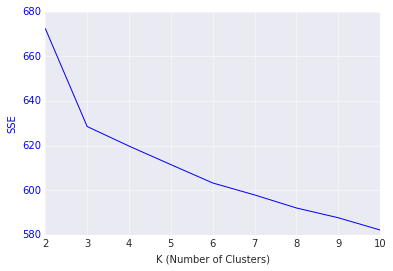

In [489]:
fig, ax1 = plt.subplots() # Check Figures, Axis Plots and SNS
ax1.plot(df_pref.index.values, df_pref['SSE'], 'b-')
ax1.set_xlabel('K (Number of Clusters)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('SSE', color='b')
ax1.tick_params('y', colors='b')
fig.savefig('Elbow')

## Find K - Silhouette and Kalinski-Harbaz

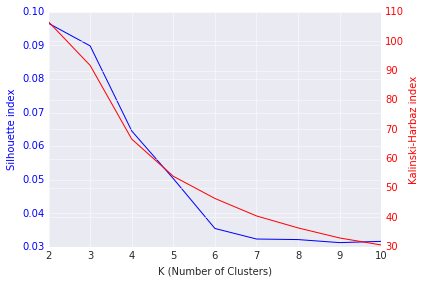

In [507]:
fig, ax1 = plt.subplots() # Check Figures, Axis Plots and SNS
ax1.plot(df_pref.index.values, df_pref['silhouette'], 'b-')
ax1.set_xlabel('K (Number of Clusters)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Silhouette index', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_pref.index.values, df_pref['kalinski'], 'r-')
ax2.set_ylabel('Kalinski-Harbaz index', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()
fig.savefig('Silhouette_Kalinski')

In [490]:
# Check this
# https://stackoverflow.com/questions/14091636/get-dict-key-by-max-value?lq=1
performances=['kalinski', 'silhouette']
for perf in performances:
    print(perf + ': '+ str(max(performance_dict[perf], key=performance_dict[perf].get)))

kalinski: 2
silhouette: 2


## Find K - Class balance

In [664]:
def cluster_balance(model, data):
    cluster_balance={}
    data_size=data.shape[0]
    for i in range(model.n_clusters):
        mask=model.predict(data)==i
        number=data[mask].shape[0]
        percentage=number/data_size*100
        cluster_balance.update({'Cluster_'+str(i): {'Sample_number':number, 'Sample_percentage':percentage}})
    return cluster_balance

In [669]:
cluster_balance(model_dict[3], X_norm)

{'Cluster_0': {'Sample_number': 349, 'Sample_percentage': 34.9},
 'Cluster_1': {'Sample_number': 322, 'Sample_percentage': 32.2},
 'Cluster_2': {'Sample_number': 329, 'Sample_percentage': 32.9}}

In [502]:
def plot_centroids(clustering):
    centroids=clustering.cluster_centers_
    plt.figure('Centroids')
    plt.figure(figsize=(10,4))
    for centroid in centroids:
        plt.plot(x_axis, centroid, marker='', linewidth=2, alpha=0.8, label='cluster'+str(centroid))
    return (plt)
# Enlarge figure, Titles, Axes, Denormalize data

## K-means centroids with 2 and 3 clusters Viz

<module 'matplotlib.pyplot' from '/Users/user/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

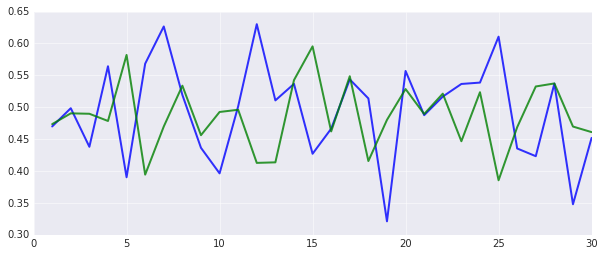

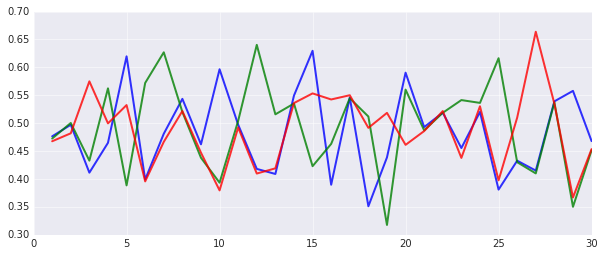

In [505]:
plot_centroids(model_dict[2])
plot_centroids(model_dict[3])

In [ ]:
melted=pd.melt(a, id_vars=['cluster'], value_vars=cols)
plt.subplots(figsize=(20,15))
ax = sns.boxplot(x="variable", y="value", hue="cluster",
                    data=melted, linewidth=2.5)

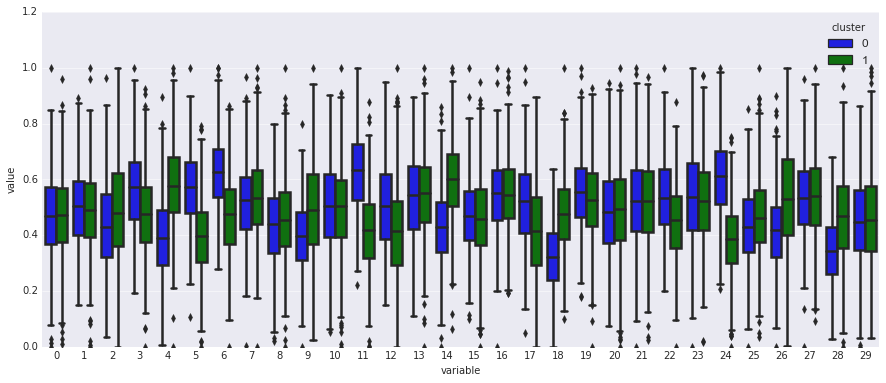

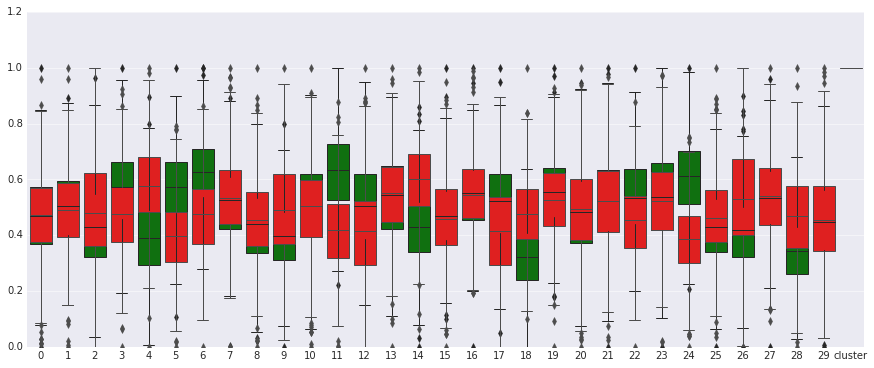

In [673]:
b=pd.DataFrame(X_norm)
b['cluster']=clusters_kmeans
melted_kmeans=pd.melt(b, id_vars=['cluster'], value_vars=cols)
plt.subplots(figsize=(15,6))
cx = sns.boxplot(x="variable", y="value", hue="cluster",
                    data=melted_kmeans, linewidth=2.5)
plt.savefig('kmeans_box')

clust1=b[b['cluster'].isin([0])]
clust2=b[b['cluster'].isin([1])]
plt.subplots(figsize=(15,6))
ax = sns.boxplot(data=clust1, orient="v", color="green")
bx = sns.boxplot(data=clust2, orient="v", color="red")

In [ ]:
# calculate mean differences




In [ ]:
#!!!! Number of samples in each cluster
# !!! check this http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# Probability based - GMMs

In [567]:
np.set_printoptions(suppress=True)
from sklearn import mixture
#https://www.kaggle.com/albertmistu/detect-anomalies-using-gmm
#https://stackoverflow.com/questions/22333601/generating-a-probability-from-a-pdf
#https://github.com/scikit-learn/scikit-learn/issues/4202
#Likelihood https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
#https://www.kaggle.com/albertmistu/detect-anomalies-using-gmm  

In [613]:
lowest_bic = np.infty # init bic to infinity (lower values are better)
bic = []
n_components_range = range(2, 11)
#cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = [ 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # select good initial means based on k-means++ method
        #kmeans_plus= KMeans(n_clusters=n_components, init='k-means++', random_state=0, n_init=10, max_iter=100).fit(X_norm)
        #initial_means=kmeans_plus.cluster_centers_
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, max_iter=1000, init_params='kmeans')
        gmm.fit(X_norm)
        # append bic performance and track best model
        bic.append(gmm.bic(X_norm))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


In [565]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [584]:
best_gmm.predict_proba(X_norm)

array([[ 0.59760575,  0.00000155,  0.40239269],
       [ 0.99997363,  0.00000001,  0.00002636],
       [ 0.00005086,  0.99994121,  0.00000793],
       ..., 
       [ 0.00000062,  0.99999476,  0.00000462],
       [ 0.00006783,  0.99863951,  0.00129266],
       [ 0.0000001 ,  0.99994197,  0.00005792]])

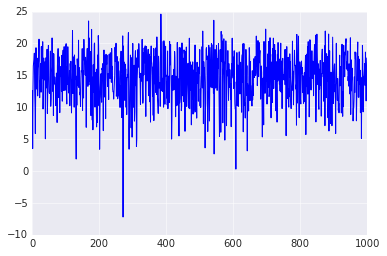

In [614]:
plt.plot(best_gmm.score_samples(X_norm))

In [591]:
best_gmm.

TypeError: 'numpy.float64' object is not callable

In [603]:
best_gmm.lower_bound_

14.600789066632004

In [624]:
from scipy.stats import multivariate_normal
a=multivariate_normal.pdf(X_norm, mean=best_gmm.means_[2], cov=best_gmm.covariances_[2])

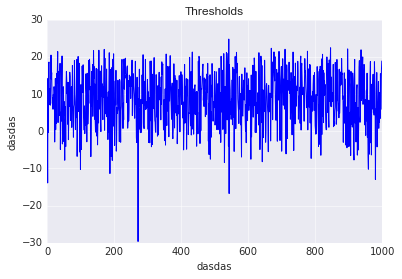

In [628]:
plt.plot(np.log(a))
plt.title('Thresholds')
plt.xlabel('dasdas')
plt.ylabel('dasdas')

In [629]:
# Here take 5% and color or label outliers

In [604]:
a = multivariate_normal.rvs(4, 2, 40)

In [578]:
np.set_printoptions(suppress=True)
pd.Series(y).describe()

count          1000.000
mean      129789174.399
std      1850360773.585
min               0.000
25%              34.926
50%            5916.757
75%         1300502.420
max     57207473926.587
dtype: float64

In [462]:
'''
visualize AIC and BIC
'''
GMM=
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

NameError: name 'GMM' is not defined

In [335]:
gmm_clustering=best_gmm.predict(X_norm)
kalinski_harbaz = metrics.calinski_harabaz_score(X_norm, gmm_clustering)

In [336]:
kalinski_harbaz

91.762658174023812

In [337]:
silhouette = metrics.silhouette_score(X_norm, gmm_clustering)

In [338]:
silhouette

0.089812895845145443

## Hierarchical (Agglomerative) clustering

In [270]:
# https://blog.csdn.net/ichuzhen/article/details/51882256
# https://www.youtube.com/watch?v=JcfIeaGzF8A
# https://www.kaggle.com/rocossa/dendrogram-hierarchical-clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [273]:
df.columns

Index(['grp', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30'],
      dtype='object')

In [680]:
mapa={'A':0, 'B':1, 'C':2}
labels = np.array(df['grp'].map(mapa))

In [435]:
lbls=['A']*1000

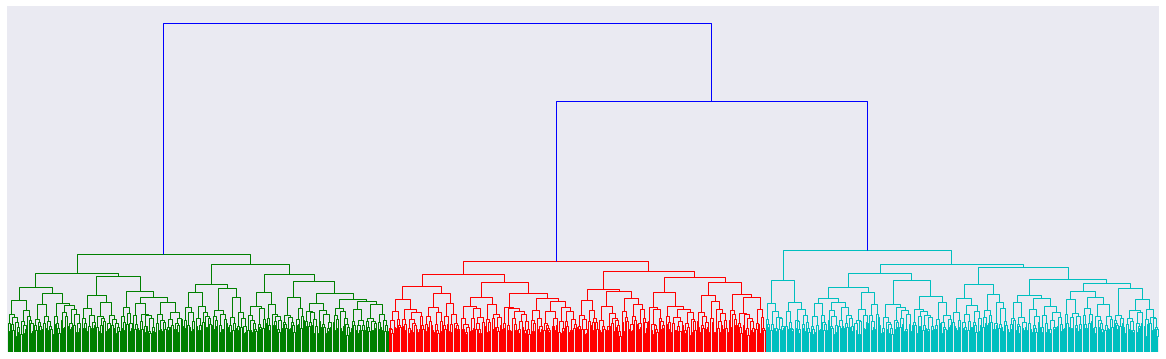

In [681]:
import scipy.cluster.hierarchy as sch

fig = pylab.figure(figsize=(60,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(X_norm, method='ward')
Z1 = sch.dendrogram(Y, labels=lbls) #orientation='right'
ax1.set_xticks([])
ax1.set_yticks([])
fig.set_size_inches(80, 8)
#fig.savefig('Dendrogram')

# Bi-clusters

In [420]:
X_norm

array([[ 0.53056099,  0.59266088,  0.69756284, ...,  0.55392654,
         0.63110111,  0.65893175],
       [ 0.57797959,  0.58869522,  0.31795135, ...,  0.65387883,
         0.57575223,  0.61469902],
       [ 0.44327599,  0.49818486,  0.74176318, ...,  0.35185492,
         0.43515654,  0.23724228],
       ..., 
       [ 0.28110086,  0.47111951,  0.40145818, ...,  0.54604788,
         0.36269868,  0.57754103],
       [ 0.68839879,  0.53441238,  0.51540009, ...,  0.30510992,
         0.31999323,  0.80573603],
       [ 0.49994776,  0.527811  ,  0.36651689, ...,  0.60877977,
         0.16623214,  0.58410787]])

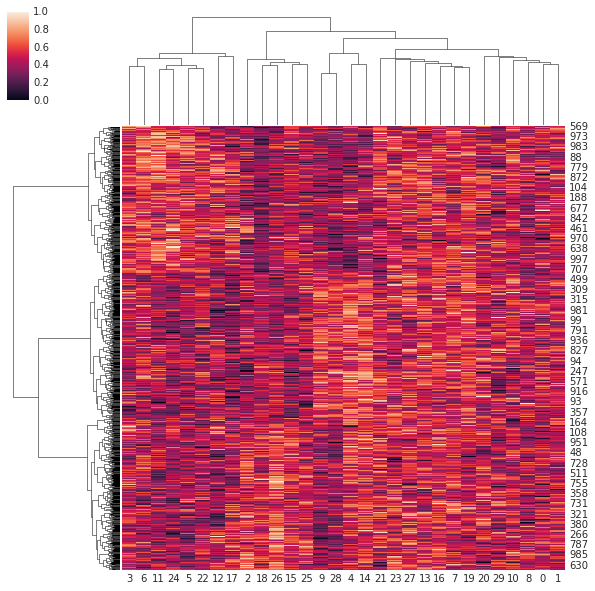

In [676]:
#https://seaborn.pydata.org/generated/seaborn.clustermap.html

g = sns.clustermap(X_norm, method='ward')
